# IPL Match Winner Prediction using Machine Learning

# Aim

* To develop a machine learning model that can accurately predict the winner of an match-related features.

# Objectives

* Understand and preprocess the dataset by analyzing key columns such as season, teams, toss details, match result, and venue.

* Build models using algorithms like Logistic Regression, SVM, KNN, Decision Tree, Random Forest, and XGBoost.

* Evaluate model performance using appropriate metrics (accuracy, precision, recall, F1-score).

* Tune hyperparameters to improve the performance of the best-performing model.

* Select the final model that offers the highest prediction accuracy and save it for deployment.

# Required Libraries

In [91]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Loading and View the Dataset

In [2]:
ipl=pd.read_csv("ipl_matches.csv")
ipl

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


# info() Used For Infromation Of DataSet

In [3]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# isnull() Used For Check Null Values And Count Of Null Values

In [4]:
ipl.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# Handling Missing Values

In [5]:
ipl['umpire2'] = ipl['umpire2'].fillna(ipl['umpire2'].mode()[0])

In [6]:
ipl['umpire1'] = ipl['umpire1'].fillna(ipl['umpire1'].mode()[0])

In [7]:
ipl['player_of_match'] = ipl['player_of_match'].fillna(ipl['player_of_match'].mode()[0])

In [8]:
ipl['winner'] = ipl['winner'].fillna(ipl['winner'].mode()[0])

In [9]:
ipl['city'] = ipl['city'].fillna(ipl['city'].mode()[0])

In [10]:
ipl.drop(columns=['umpire3'], inplace=True)

In [11]:
ipl.isnull().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

**Missing Values Filled with Mode**

* Columns like city, winner, player_of_match, umpire1, and umpire2 had missing entries.

* Using the mode (most frequent value), categorical columns are complete without removing rows

In [12]:
ipl.shape

(756, 17)

# Checking for Duplicate Rows

In [13]:
ipl.drop_duplicates()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,HDPK Dharmasena,C Shamshuddin
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [14]:
ipl.shape

(756, 17)

# THE DESCRIBE( ) IS USED TO IDENTIFY STATISTICAL CALCULATION FOR NUMERICAL COLUMNS


In [15]:
ipl.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# OUTLIERS

In [93]:
ipl0=ipl[['win_by_runs','win_by_wickets']]
len(ipl0.columns)

2

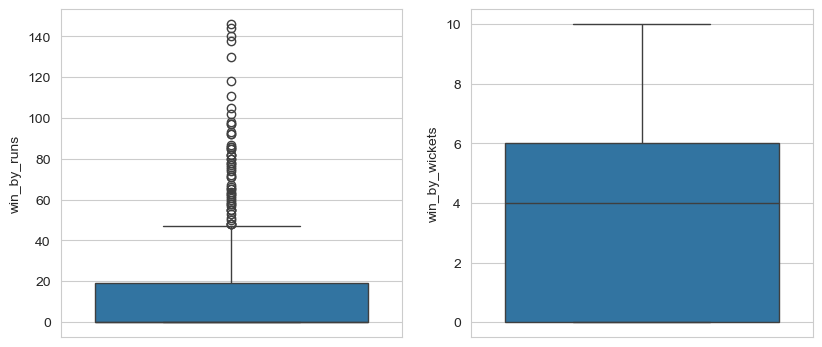

In [95]:
plt.figure(figsize=(15,40))
for i in range(len(ipl0.columns)):
    plt.subplot(8, 3,i+1)
    sns.boxplot(y=ipl0.columns[i],data=ipl)
plt.show()

* win_by_runs shows high outliers, some teams won by large margins.
* win_by_wickets has a spread, with most wins between 4–6 wickets.
* No extreme outliers are seen in wicket-based wins, indicating consistent chase patterns

# **DATA VISUALIZATIONS**

**BAR CHART of IPL Team Performance: Match Wins Overview**

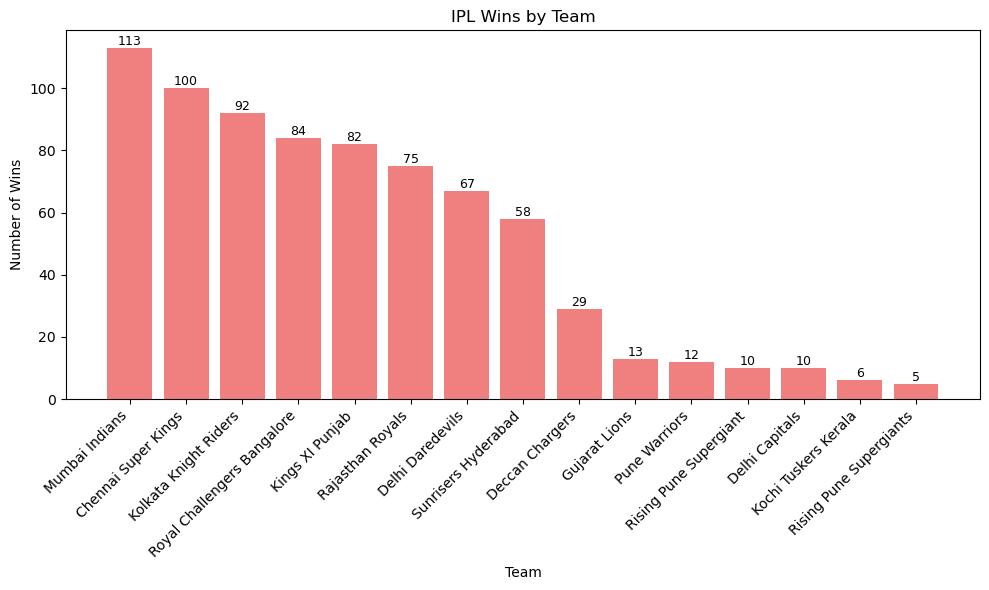

In [19]:
win_counts = ipl["winner"].value_counts()
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(win_counts)), win_counts.values, color="lightcoral")
plt.xticks(range(len(win_counts)), win_counts.index, rotation=45, ha='right')

for i, bar in enumerate(bars):
    plt.text(i, bar.get_height(), int(bar.get_height()), ha='center', va='bottom', fontsize=9)

plt.xlabel("Team")
plt.ylabel("Number of Wins")
plt.title("IPL Wins by Team")
plt.tight_layout()
plt.show()

**INSIGHTS**
* Mumbai Indians have won the most matches 113 times.
* Chennai Super Kings are next with 100 wins.
* Kolkata and Bangalore teams have around 90 and 84 wins.
* Kochi and Rising have a less than 15 wins.

**PIE CHART Toss Decisions in IPL**

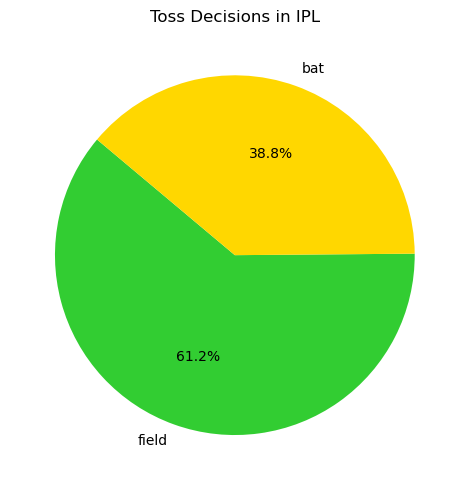

In [20]:
toss_decisions = ipl["toss_decision"].value_counts()
plt.figure(figsize=(10,5))
plt.pie(toss_decisions, labels=toss_decisions.index, autopct='%1.1f%%', startangle=140, colors=["limegreen", "gold"])
plt.title("Toss Decisions in IPL")
plt.tight_layout()
plt.show()

**INSIGHTS**
* Most teams prefer to field first
* Fewer teams opt to bat first
* In evening matches, captains often choose to field first due to the dew that forms later in the game.

**BAR CHART of Top 15 Matches by Venue**

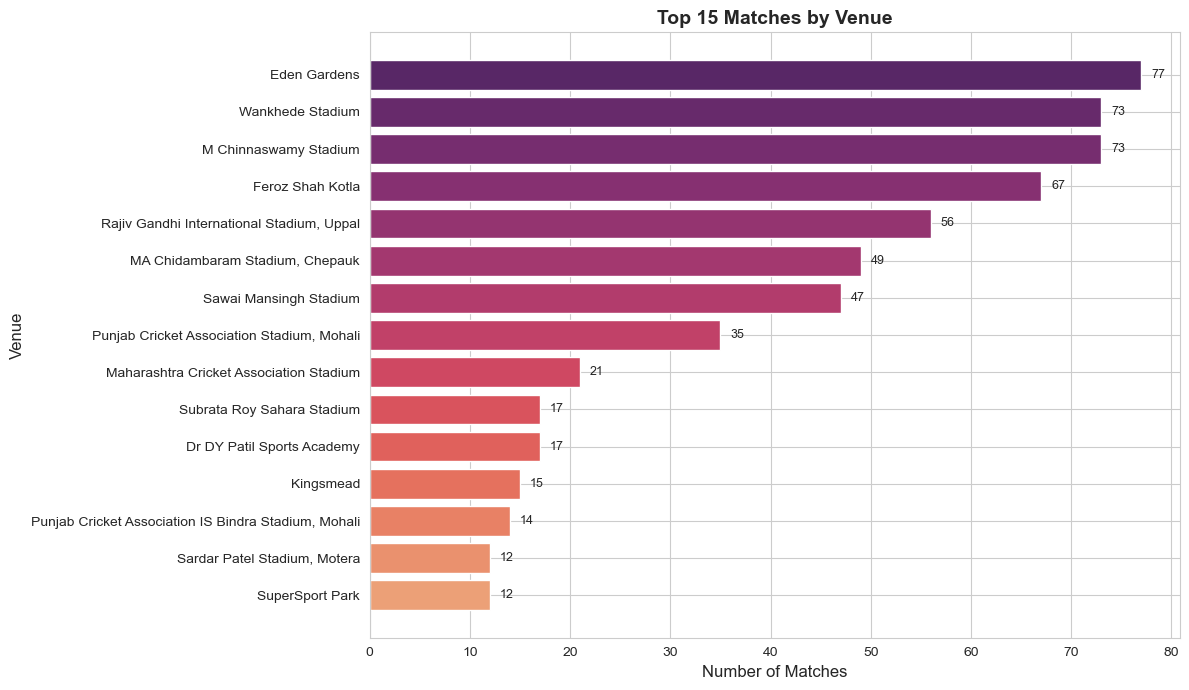

In [21]:
sns.set_style("whitegrid")
top_venues = ipl["venue"].value_counts().head(15)
plt.figure(figsize=(12, 7))
bars = plt.barh(top_venues.index[::-1], top_venues.values[::-1], color=sns.color_palette("flare", 15))

for i, value in enumerate(top_venues.values[::-1]):
    plt.text(value + 1, i, str(value), va='center', fontsize=9)

plt.xlabel("Number of Matches", fontsize=12)
plt.ylabel("Venue", fontsize=12)
plt.title("Top 15 Matches by Venue", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**INSIGHTS**
* Eden Gardens is the most frequently used venue, hosting the highest number of matches (around 75+)
* Wankhede Stadium and M. Chinnaswamy Stadium follow closely with high match counts.
* There is a step drop after the top 5 venues.

**BAR CHART of Top 15 Player of the Match Winners**

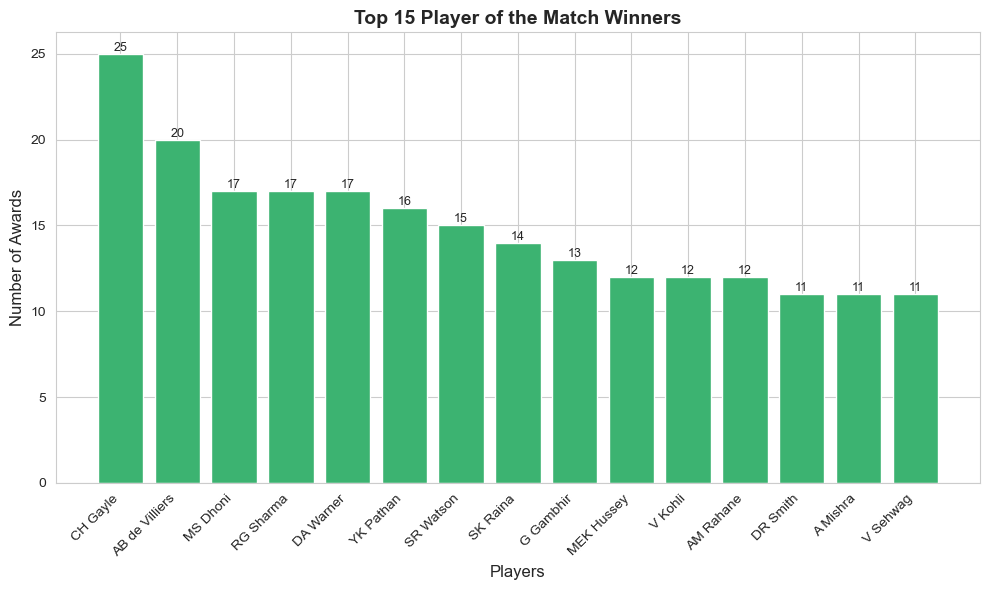

In [22]:
top_players = ipl["player_of_match"].value_counts().head(15)
plt.figure(figsize=(10, 6))
bars = plt.bar(top_players.index, top_players.values, color="mediumseagreen")

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()),
             ha='center', va='bottom', fontsize=9)

plt.xlabel("Players", fontsize=12)
plt.ylabel("Number of Awards", fontsize=12)
plt.title("Top 15 Player of the Match Winners", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**INSIGHTS**
* CH Gayle dominates as the top Player of the Match winner.
* AB de Villiers and MS Dhoni are close behind.
* The list is dominated by top-order batsmen and all-rounders.

**HISTOGRAM CHART of Distribution of Victory by Runs**

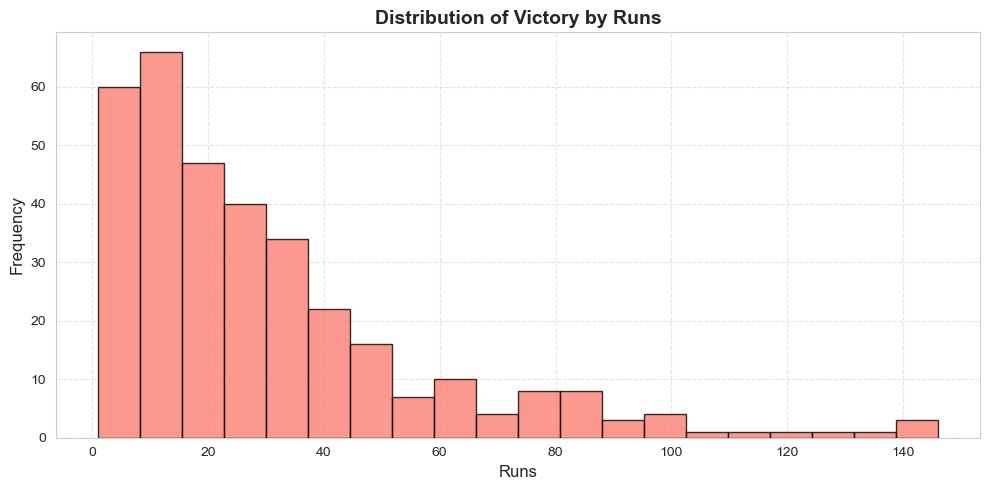

In [23]:
run_wins = ipl[ipl["win_by_runs"] > 0]["win_by_runs"]
plt.figure(figsize=(10, 5))
plt.hist(run_wins, bins=20, color="salmon", edgecolor="black", alpha=0.8)
plt.title("Distribution of Victory by Runs", fontsize=14, fontweight='bold')
plt.xlabel("Runs", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**INSIGHTS**
* Most matches are won by very small margins (below 20 runs).
* Victory margins above 50 runs are very rare.
* A long tail exists up to around 100+ run wins.

**HISTOGRAM CHART of Distribution of Victory by Wickets**

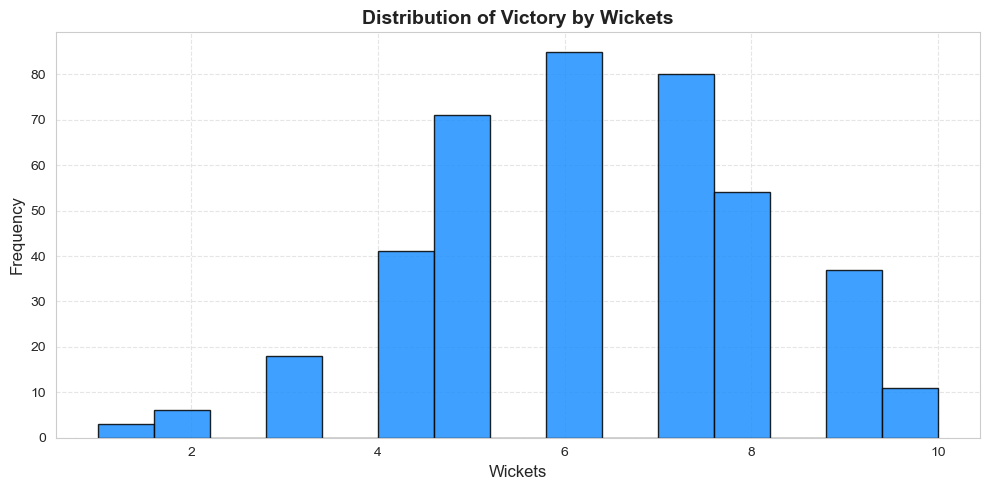

In [24]:
wicket_wins = ipl[ipl["win_by_wickets"] > 0]["win_by_wickets"]
plt.figure(figsize=(10, 5))
plt.hist(wicket_wins, bins=15, color="dodgerblue", edgecolor="black", alpha=0.85)
plt.grid(True, linestyle='--', alpha=0.5)
plt.title("Distribution of Victory by Wickets", fontsize=14, fontweight='bold', color="#222")
plt.xlabel("Wickets", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

**INSIGHTS**
* The greatest number of matches are won with 0 wickets remaining, indicating a high frequency of close finishes.
* Victories secured with 1, 2, or 3 wickets left are rare.
* A moderate frequency of victories occurs with 4, 5, 6, or 7 wickets left, indicating that teams often win.
* Matches won with 8, 9, or 10 wickets remaining are relatively infrequent.

**BAR CHART of Number of Matches Played on Seasons**

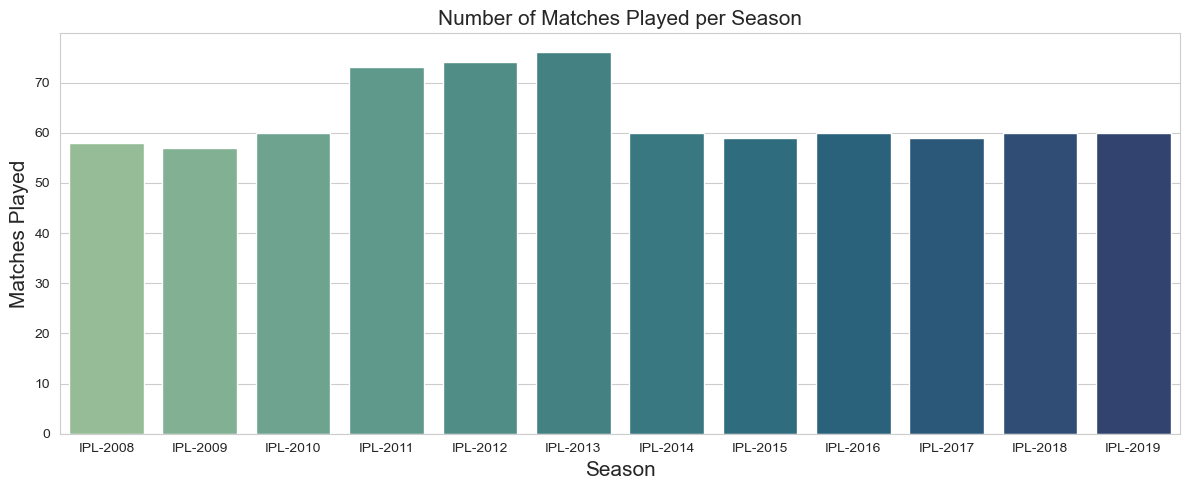

In [25]:
ordered_seasons = sorted(ipl["Season"].unique())
plt.figure(figsize=(12, 5))
sns.countplot(x=ipl["Season"], order=ordered_seasons, palette=sns.color_palette("crest", len(ordered_seasons)))
plt.title("Number of Matches Played per Season", fontsize=15)
plt.xlabel("Season", fontsize=15)
plt.ylabel("Matches Played", fontsize=15)
plt.tight_layout()
plt.show()

**INSIGHTS**
* Peaking at IPL-2013, and then a subsequent decrease and stabilization in later seasons.
* IPL-2011, IPL-2012, and IPL-2013 had the highest number of matches played compared to other seasons.
* Early seasons (IPL-2008 to IPL-2010) and recent seasons (IPL-2017 to IPL-2019) had a similar, lower count of matches played.

**COUNT Plot of Toss winner's choice of Batting vs Fielding**

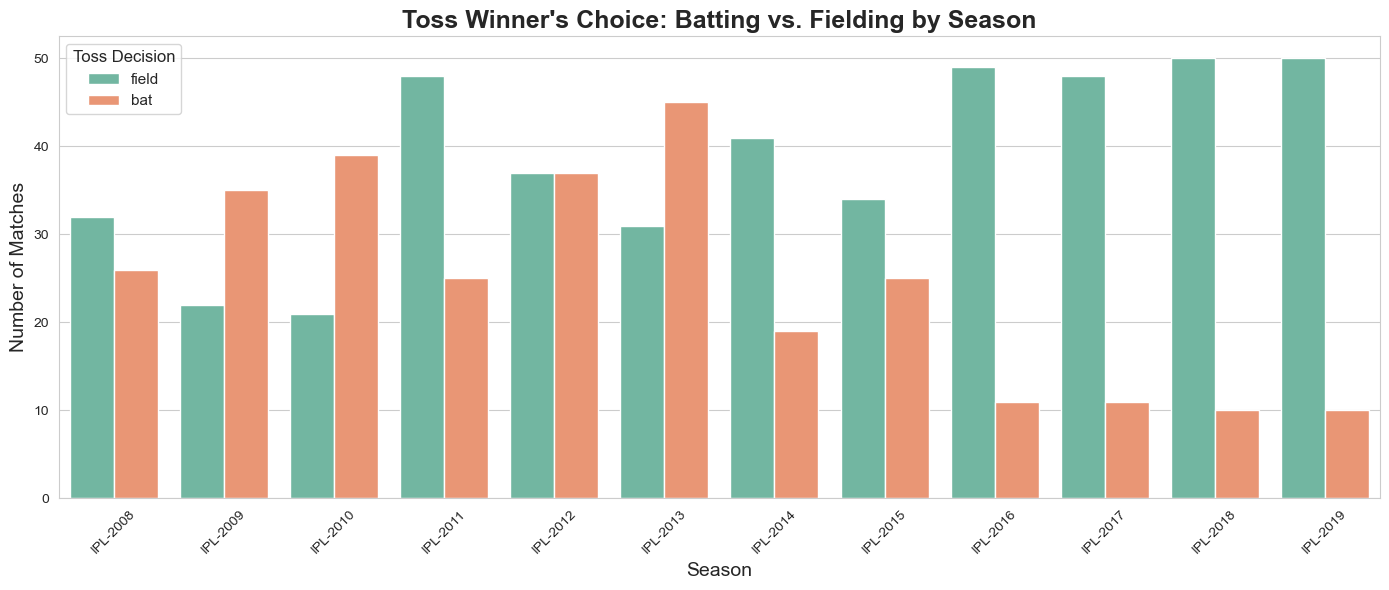

In [26]:
ordered_seasons = sorted(ipl["Season"].unique())
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))
sns.countplot(x="Season", hue="toss_decision", data=ipl,
              order=ordered_seasons,
              palette="Set2")
plt.title("Toss Winner's Choice: Batting vs. Fielding by Season", fontsize=18, fontweight='bold')
plt.xlabel("Season", fontsize=14)
plt.ylabel("Number of Matches", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Toss Decision", title_fontsize=12, fontsize=11)
plt.tight_layout()
plt.show()

**INSIGHTS**
* Fielding is the dominant choice, In most seasons (especially from 2016 onwards), toss winners have preferred to field first rather than bat.
* Batting preference was higher in early seasons, Between IPL 2009 and IPL 2013, batting was frequently chosen.

**Line Chart of Toss Toss Wins by Team**

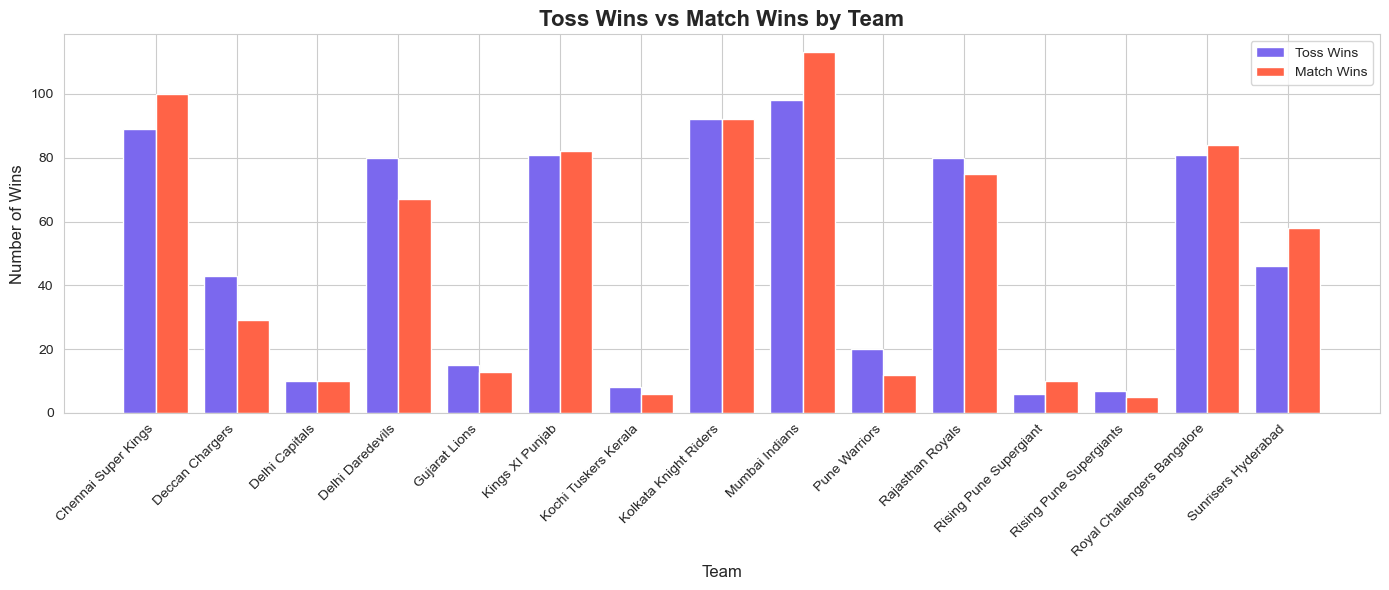

In [27]:
toss_wins = ipl["toss_winner"].value_counts()
match_wins = ipl["winner"].value_counts()
teams = sorted(set(toss_wins.index).union(set(match_wins.index)))
toss_counts = [toss_wins.get(team, 0) for team in teams]
match_counts = [match_wins.get(team, 0) for team in teams]
x = np.arange(len(teams))
width = 0.4
plt.figure(figsize=(14, 6))
plt.bar(x - width/2, toss_counts, width, label='Toss Wins', color='mediumslateblue')
plt.bar(x + width/2, match_counts, width, label='Match Wins', color='tomato')
plt.title("Toss Wins vs Match Wins by Team", fontsize=16, fontweight='bold')
plt.xlabel("Team", fontsize=12)
plt.ylabel("Number of Wins", fontsize=12)
plt.xticks(x, teams, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

**INSIGHTS**
* Mumbai Indians lead, They have won the highest number of tosses (close to 100).
* Other dominant teams, Kolkata Knight Riders, Chennai Super Kings, and Kings XI Punjab also feature strongly, each winning over 80 tosses.
* Mid-range performers, Teams like Rajasthan Royals, Royal Challengers Bangalore, and Delhi Daredevils (Capitals) sit in the mid-tier, with around 70–80 toss wins.

**Total States of Winner Counts**

In [28]:
total_city_win=ipl.groupby("winner")["winner"].count().reset_index(name="count")
total_city_win

,winner,count
0,Chennai Super Kings,100
1,Deccan Chargers,29
2,Delhi Capitals,10
3,Delhi Daredevils,67
4,Gujarat Lions,13
5,Kings XI Punjab,82
6,Kochi Tuskers Kerala,6
7,Kolkata Knight Riders,92
8,Mumbai Indians,113
9,Pune Warriors,12


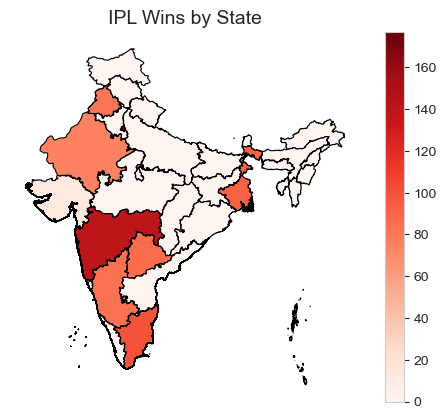

In [29]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

rows = [
    ("Chennai", "Tamil Nadu", 100), ("Hyderabad", "Telangana", 87), ("Delhi", "Delhi", 177),
    ("Mumbai", "Maharashtra", 113), ("Pune", "Maharashtra", 27), ("Kolkata", "West Bengal", 92),
    ("Bengaluru", "Karnataka", 84), ("Mohali", "Punjab", 82), ("Ahmedabad", "Gujarat", 13),
    ("Kochi", "Kerala", 0), ("Jaipur", "Rajasthan", 75)
]

state_data = pd.DataFrame(rows, columns=["city", "state", "count"]).groupby("state")["count"].sum().reset_index()

url = "https://raw.githubusercontent.com/geohacker/india/master/state/india_telengana.geojson"
india_states = gpd.read_file(url)

merged = india_states.merge(state_data, left_on="NAME_1", right_on="state", how="left").fillna(0)
merged.plot(column="count", cmap="Reds", linewidth=0.8, edgecolor="black", legend=True)

plt.title("IPL Wins by State", fontsize=14)
plt.axis("off")
plt.show()

**INSIGHTS**
* States with deeper red shades such as Maharashtra, Tamil Nadu, and Karnataka have the highest number of IPL wins.
* States in north and east India, like Punjab and West Bengal, also show moderately high win counts.
* States with lighter shades including many in central and northeast India have fewer IPL wins.

**Count Plot of Umpires-1 who have umpired most**

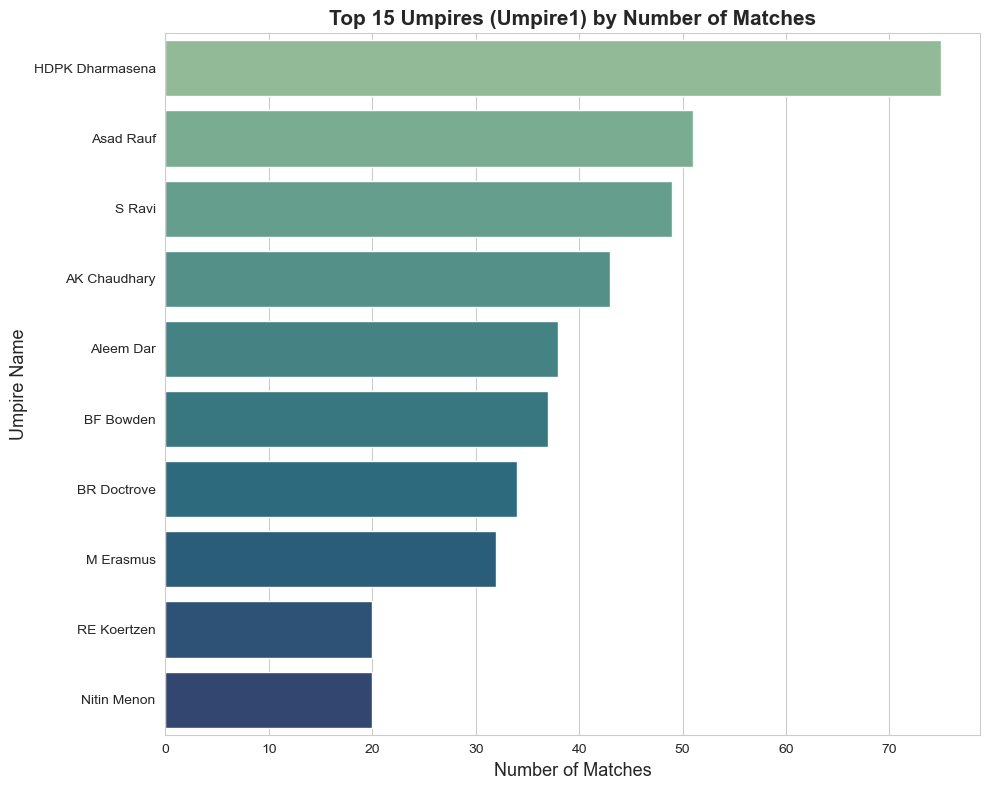

In [30]:
top_umpires = ipl['umpire1'].value_counts().head(10)
plt.figure(figsize=(10, 8))
sns.barplot(y=top_umpires.index, x=top_umpires.values, palette="crest")
plt.xlabel("Number of Matches", fontsize=13)
plt.ylabel("Umpire Name", fontsize=13)
plt.title("Top 15 Umpires (Umpire1) by Number of Matches", fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

**INSIGHTS**
* HDKP Dharmasena leads as the most experienced IPL umpire, having officiated the highest number of matches.
* Asad Rauf and S Ravi follow closely, showing strong consistency and long-standing involvement in the tournament.
* Prominent international umpires like Aleem Dar, BF Bowden, and RE Koertzen feature among the top, reflecting the IPL’s global officiating standards.

**Count Plot of Umpires-2 who have umpired most**

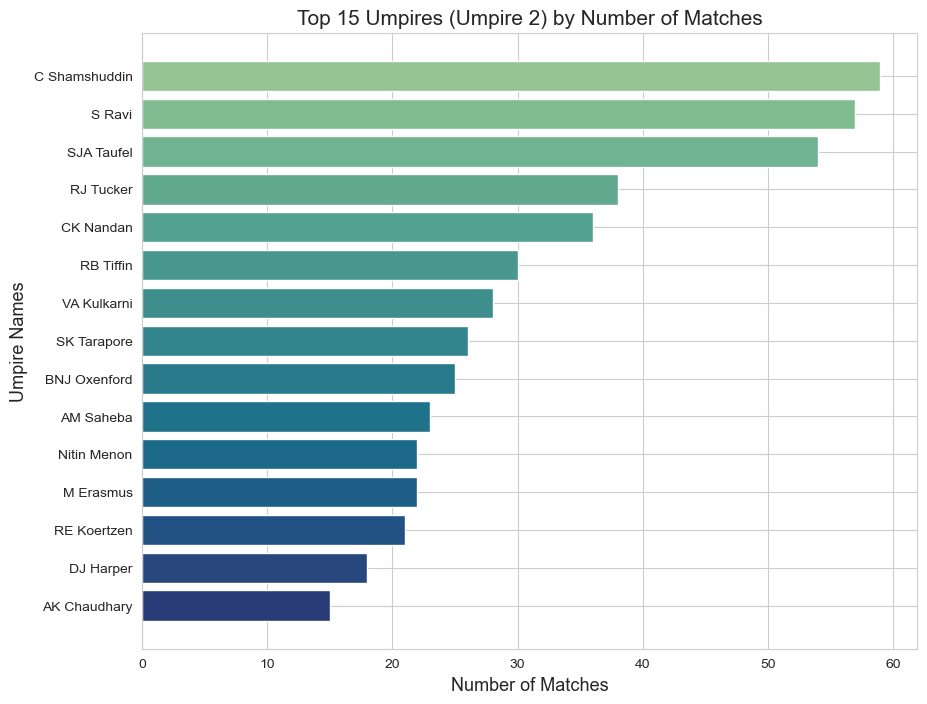

In [31]:
plt.figure(figsize=(10, 8))
umpire_counts = ipl['umpire2'].value_counts().head(15)
plt.barh(umpire_counts.index, umpire_counts.values, color=sns.color_palette('crest', 15))
plt.xlabel("Number of Matches", fontsize=13)
plt.ylabel("Umpire Names", fontsize=13)
plt.title("Top 15 Umpires (Umpire 2) by Number of Matches", fontsize=15)
plt.gca().invert_yaxis()  
plt.show()

**INSIGHTS**
* C Shamshuddin and S Ravi dominate this list, standing out as the most frequent Umpire-2 officials in IPL matches.
* International umpires like SJA Taufel, RJ Tucker, and RB Tiffin are consistently present, showing IPL’s reliance on experienced global officials.
* Indian umpires such as CK Nandan, VA Kulkarni, and SK Tarapore are also highly represented, balancing international presence with local expertise.

# Required Libraries for Model

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# Label Encoder for String to Numericals

In [33]:
label_encoders = {}
for col in ipl.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    ipl[col] = le.fit_transform(ipl[col])
    label_encoders[col] = le

x = ipl.drop(["winner","date","id","Season","city","dl_applied","umpire1","umpire2"], axis=1)
y = ipl["winner"]

In [34]:
x.head()

,team1,team2,toss_winner,toss_decision,result,win_by_runs,win_by_wickets,player_of_match,venue
0,14,13,13,1,1,35,0,224,28
1,8,11,11,1,1,0,7,199,21
2,4,7,7,1,1,0,10,34,31
3,11,5,5,1,1,0,6,61,13
4,13,3,13,0,1,15,0,99,17


In [35]:
c=LabelEncoder()
y=c.fit_transform(y.astype(str))

In [36]:
x.shape,y.shape

((756, 9), (756,))

# train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [39]:
x_train

array([[-0.00975683, -0.93720097,  0.0346009 , ..., -1.00474742,
         1.09828639, -1.12453385],
       [ 1.35019543,  0.68477435,  0.73905974, ...,  1.05642293,
         1.26755533, -0.33331381],
       [-0.46307425, -0.01035793, -0.43503832, ...,  1.35087583,
        -0.77777771,  0.54581956],
       ...,
       [ 0.44356059,  0.68477435,  0.73905974, ...,  0.76197002,
        -0.00196173,  0.98538625],
       [-0.46307425,  0.68477435,  0.73905974, ...,  1.35087583,
        -0.2135479 ,  0.54581956],
       [-0.00975683, -1.63233326,  0.0346009 , ..., -1.00474742,
         0.05446125, -1.12453385]])

# LOGISTIC REGRESSION

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [42]:
y_pred=lr_model.predict(x_test)

In [43]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall_lr = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1_lr = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)

Accuracy: 0.3092105263157895
Precision: 0.27846332911154886
Recall: 0.3092105263157895
F1 Score: 0.2856820557707276


In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.69      0.55        26
           1       0.20      0.14      0.17         7
           2       0.27      0.21      0.24        14
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.30      0.25      0.27        12
           6       0.36      0.33      0.35        12
           7       0.00      0.00      0.00         1
           8       0.12      0.11      0.12         9
           9       0.00      0.00      0.00         4
          10       0.33      0.24      0.28        17
          12       0.32      0.32      0.32        22
          13       0.18      0.32      0.23        19
          14       0.00      0.00      0.00         4

    accuracy                           0.31       152
   macro avg       0.18      0.19      0.18       152
weighted avg       0.28      0.31      0.29       152



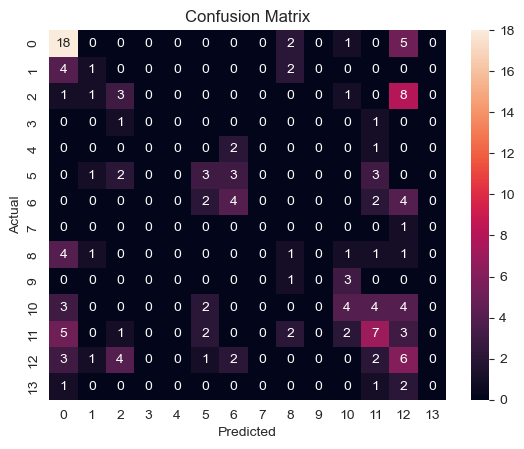

In [47]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# SVC (Support Vector Classifier)

In [48]:
from sklearn.svm import SVC

In [49]:
svc_model=SVC()
svc_model.fit(x_train,y_train)

SVC()

In [50]:
y_pred=svc_model.predict(x_test)

In [51]:
accuracy_svc = accuracy_score(y_test, y_pred)
precision_svc = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall_svc = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1_svc = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Accuracy:", accuracy_svc)
print("Precision:", precision_svc)
print("Recall:", recall_svc)
print("F1 Score:", f1_svc)

Accuracy: 0.5
Precision: 0.4351595606191195
Recall: 0.5
F1 Score: 0.4492439183513128


In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        26
           1       0.00      0.00      0.00         7
           2       0.46      0.43      0.44        14
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.38      0.67      0.48        12
           6       0.33      0.08      0.13        12
           7       0.00      0.00      0.00         1
           8       0.31      0.56      0.40         9
           9       0.00      0.00      0.00         4
          10       0.50      0.53      0.51        17
          12       0.65      0.50      0.56        22
          13       0.36      0.53      0.43        19
          14       0.00      0.00      0.00         4

    accuracy                           0.50       152
   macro avg       0.27      0.31      0.27       152
weighted avg       0.44      0.50      0.45       152



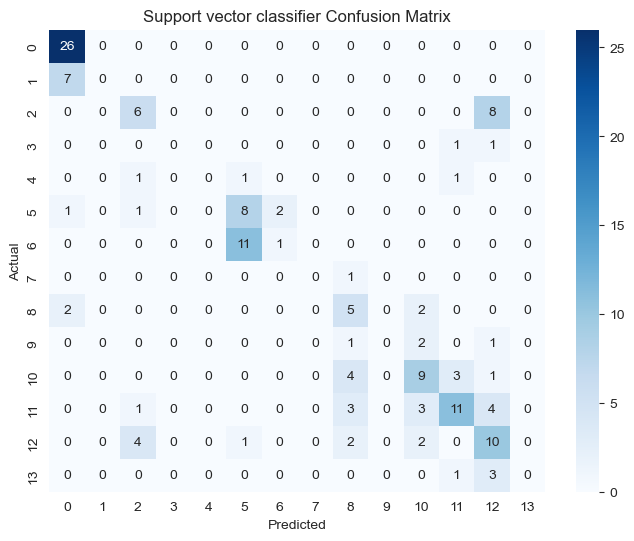

In [53]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")
plt.title("Support vector classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# KNN (K-Nearest Neighbor)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn_model= KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [56]:
y_pred=knn_model.predict(x_test)

In [57]:
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall_knn = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1_knn = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

Accuracy: 0.46710526315789475
Precision: 0.4855810503269669
Recall: 0.46710526315789475
F1 Score: 0.4288253999162812


In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        26
           1       1.00      0.14      0.25         7
           2       0.31      0.64      0.42        14
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.39      0.58      0.47        12
           6       0.67      0.17      0.27        12
           7       0.00      0.00      0.00         1
           8       0.33      0.33      0.33         9
           9       1.00      0.25      0.40         4
          10       0.33      0.35      0.34        17
          12       0.61      0.50      0.55        22
          13       0.36      0.26      0.30        19
          14       0.00      0.00      0.00         4

    accuracy                           0.47       152
   macro avg       0.40      0.30      0.29       152
weighted avg       0.49      0.47      0.43       152



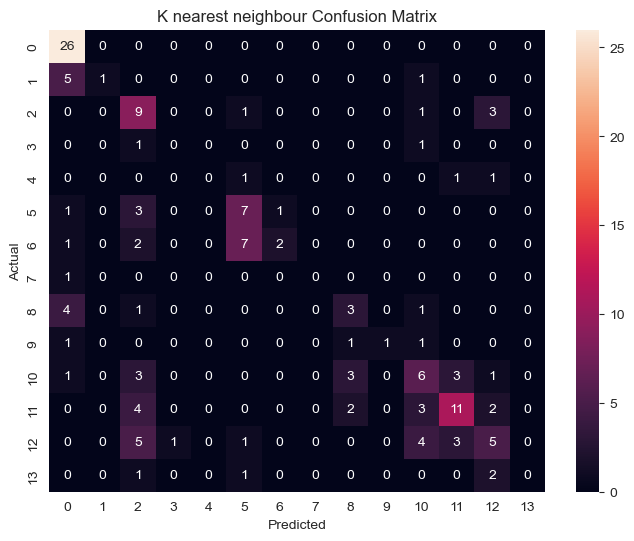

In [59]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)
plt.title("K nearest neighbour Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dtc_model=DecisionTreeClassifier()
dtc_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [62]:
y_pred=dtc_model.predict(x_test)

In [63]:
accuracy_dtc = accuracy_score(y_test, y_pred)
precision_dtc = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall_dtc = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1_dtc = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Accuracy:", accuracy_dtc)
print("Precision:", precision_dtc)
print("Recall:", recall_dtc)
print("F1 Score:", f1_dtc)

Accuracy: 0.8947368421052632
Precision: 0.875095597449506
Recall: 0.8947368421052632
F1 Score: 0.8794019432229161


In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       1.00      1.00      1.00         7
           2       0.82      1.00      0.90        14
           3       1.00      1.00      1.00         2
           4       1.00      0.67      0.80         3
           5       0.75      1.00      0.86        12
           6       0.75      0.50      0.60        12
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         4
          10       0.94      0.88      0.91        17
          12       0.92      1.00      0.96        22
          13       0.81      0.89      0.85        19
          14       0.00      0.00      0.00         4

    accuracy                           0.89       152
   macro avg       0.86      0.85      0.85       152
weighted avg       0.88      0.89      0.88       152



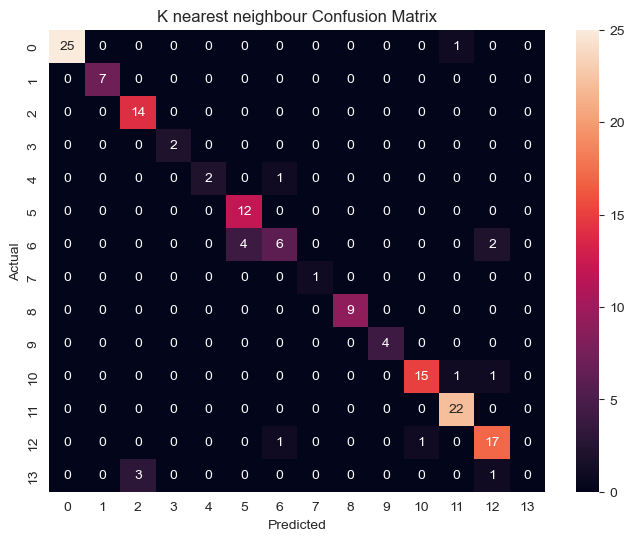

In [65]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)
plt.title("K nearest neighbour Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rfc_model=RandomForestClassifier()
rfc_model.fit(x_train,y_train)

RandomForestClassifier()

In [68]:
y_pred=rfc_model.predict(x_test)

In [69]:
accuracy_rfc = accuracy_score(y_test, y_pred)
precision_rfc = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall_rfc = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1_rfc = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Accuracy:", accuracy_rfc)
print("Precision:", precision_rfc)
print("Recall:", recall_rfc)
print("F1 Score:", f1_rfc)

Accuracy: 0.8552631578947368
Precision: 0.8448775424781617
Recall: 0.8552631578947368
F1 Score: 0.8394130431660447


In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       1.00      0.43      0.60         7
           2       0.82      1.00      0.90        14
           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00         3
           5       0.85      0.92      0.88        12
           6       0.92      0.92      0.92        12
           7       0.00      0.00      0.00         1
           8       0.69      1.00      0.82         9
           9       1.00      0.75      0.86         4
          10       0.93      0.82      0.88        17
          12       0.95      0.91      0.93        22
          13       0.82      0.95      0.88        19
          14       0.00      0.00      0.00         4

    accuracy                           0.86       152
   macro avg       0.71      0.66      0.66       152
weighted avg       0.84      0.86      0.84       152



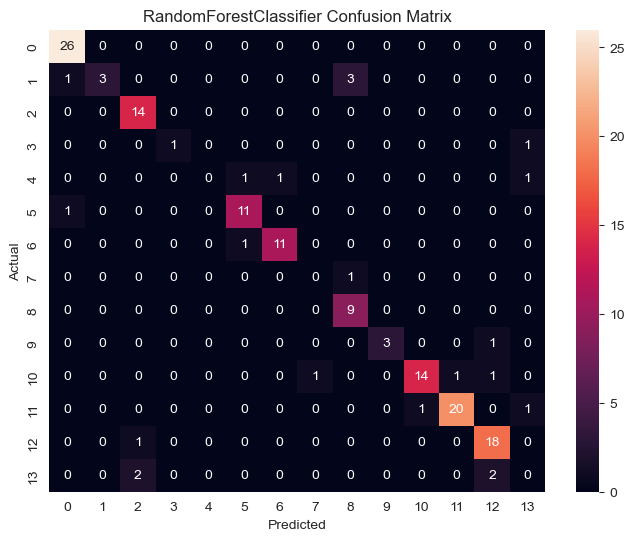

In [71]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)
plt.title("RandomForestClassifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# XG Boost 

In [72]:
!pip install xgboost

In [73]:
import xgboost as xgb 
xgb_model=xgb.XGBClassifier(n_jobs=-1)

In [74]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)

In [75]:
y_pred=xgb_model.predict(x_test)

In [76]:
accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall_xgb = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1_xgb = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)

Accuracy: 0.9736842105263158
Precision: 0.9563331405436669
Recall: 0.9736842105263158
F1 Score: 0.9644534412955466


In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         3
           5       0.92      1.00      0.96        12
           6       0.86      1.00      0.92        12
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00        17
          12       1.00      1.00      1.00        22
          13       0.95      0.95      0.95        19
          14       1.00      1.00      1.00         4

    accuracy                           0.97       152
   macro avg       0.91      0.92      0.92       152
weighted avg       0.96      0.97      0.96       152



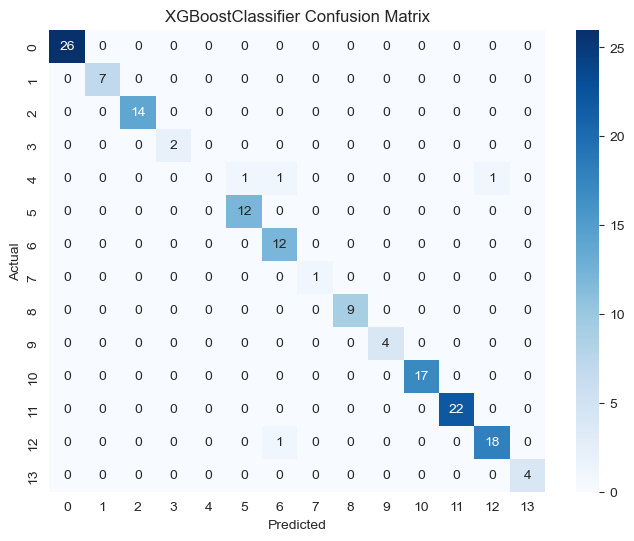

In [78]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("XGBoostClassifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [79]:
accuracy_model=[]
precision_model=[]
recall_model=[]
f1_model=[]

In [80]:
accuracy_model.append(accuracy_lr)
accuracy_model.append(accuracy_svc)
accuracy_model.append(accuracy_knn)
accuracy_model.append(accuracy_dtc)
accuracy_model.append(accuracy_rfc)
accuracy_model.append(accuracy_xgb)

In [81]:
precision_model.append(precision_lr)
precision_model.append(precision_svc)
precision_model.append(precision_knn)
precision_model.append(precision_dtc)
precision_model.append(precision_rfc)
precision_model.append(precision_xgb)

In [82]:
recall_model.append(recall_lr)
recall_model.append(recall_svc)
recall_model.append(recall_knn)
recall_model.append(recall_dtc)
recall_model.append(recall_rfc)
recall_model.append(recall_xgb)

In [83]:
f1_model.append(f1_lr)
f1_model.append(f1_svc)
f1_model.append(f1_knn)
f1_model.append(f1_dtc)
f1_model.append(f1_rfc)
f1_model.append(f1_xgb)

In [84]:
print(accuracy_model)
print(precision_model)
print(recall_model)
print(f1_model)

[0.3092105263157895, 0.5, 0.46710526315789475, 0.8947368421052632, 0.8552631578947368, 0.9736842105263158]
[0.27846332911154886, 0.4351595606191195, 0.4855810503269669, 0.875095597449506, 0.8448775424781617, 0.9563331405436669]
[0.3092105263157895, 0.5, 0.46710526315789475, 0.8947368421052632, 0.8552631578947368, 0.9736842105263158]
[0.2856820557707276, 0.4492439183513128, 0.4288253999162812, 0.8794019432229161, 0.8394130431660447, 0.9644534412955466]


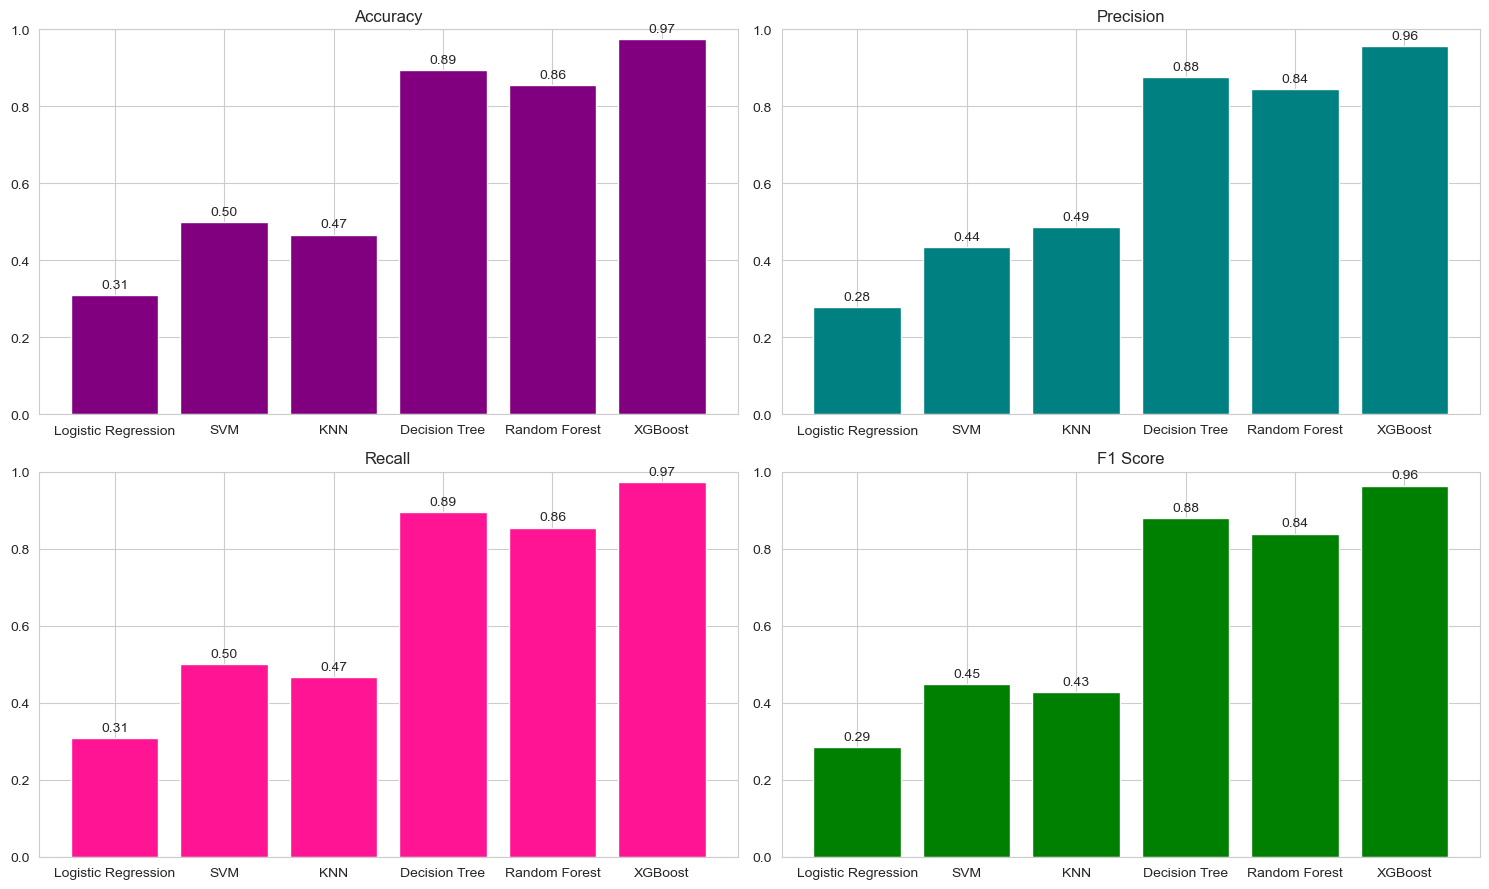

In [85]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']

# Make sure metric lists are the same length as models
accuracy_model = accuracy_model[:6]
precision_model = precision_model[:6]
recall_model = recall_model[:6]
f1_model = f1_model[:6]

fig, axs = plt.subplots(2, 2, figsize=(15, 9))

bars1 = axs[0, 0].bar(models, accuracy_model, color='purple')
axs[0, 0].set_title("Accuracy")
axs[0, 0].set_ylim(0, 1)
axs[0, 0].bar_label(bars1, fmt="%.2f", padding=3)

bars2 = axs[0, 1].bar(models, precision_model, color='teal')
axs[0, 1].set_title("Precision")
axs[0, 1].set_ylim(0, 1)
axs[0, 1].bar_label(bars2, fmt="%.2f", padding=3)

bars3 = axs[1, 0].bar(models, recall_model, color='deeppink')
axs[1, 0].set_title("Recall")
axs[1, 0].set_ylim(0, 1)
axs[1, 0].bar_label(bars3, fmt="%.2f", padding=3)

bars4 = axs[1, 1].bar(models, f1_model, color='green')
axs[1, 1].set_title("F1 Score")
axs[1, 1].set_ylim(0, 1)
axs[1, 1].bar_label(bars4, fmt="%.2f", padding=3)

plt.tight_layout()
plt.show()

# Hyperparameter tuning using GridSearchCV for Xgboost Classification

In [86]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Base model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Grid search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Best model
best_xgb_model = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1}
Best Accuracy: 0.9486888987406203


In [87]:
y_pred_tuned = best_xgb_model.predict(x_test)
print("Tuned XGBoost Report:\n", classification_report(y_test, y_pred_tuned))

Tuned XGBoost Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         3
           5       1.00      1.00      1.00        12
           6       0.92      1.00      0.96        12
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         4
          10       1.00      0.94      0.97        17
          12       0.96      1.00      0.98        22
          13       0.95      1.00      0.97        19
          14       0.80      1.00      0.89         4

    accuracy                           0.97       152
   macro avg       0.90      0.92      0.91       152
weighted avg       0.96      0.97      0.96       152



In [88]:
import joblib

In [89]:
joblib.dump(best_xgb_model, "xgboost_model.pkl")

['xgboost_model.pkl']